In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from time import time

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [71]:
columns = ['','text_final','polarity','VADER_score','VADER_binary']

train = pd.read_csv('dataset_05.csv',
                     header = 0,
                     names = columns,
                     usecols = [1,4], #VADER_binary target column
                     encoding ='ISO-8859-1')

In [72]:
columns_test = ['','text_no_tag','polarity','length']
test = pd.read_csv('finaltest.csv',
                     usecols = [1,2],
                     header = 0,
                     names = columns_test,
                     encoding ='ISO-8859-1')

In [73]:
train.tail()

,text_final,VADER_binary
602761,woo ! xbox is back,1
602762,"@USER yeah , that does work better than just w...",1
602763,just woke up . having no school is the best fe...,1
602764,happy 3 8 th birthday to my boo of all time !...,1
602765,happy charity tuesday @USER @USER @USER,1


In [74]:
test.head()

,text_no_tag,polarity
0,@USER i love my kindle2 . not that the is co...,4
1,reading my kindle2 . love it . lee childs is...,4
2,"ok , first assesment of the kindle 2 . it fuc...",4
3,@USER you will love your kindle2 . i have had ...,4
4,@USER fair enough . but i have the kindle2 and...,4


In [75]:
len_train = len(train)
print("len training: " , len_train)
len_test = len(test)
print("len test: " , len_test)

len training:  602766
len test:  359


### test polarity transformation 4->1

In [76]:
test['polarity'].replace(to_replace=[4],value=1,inplace=True)

In [78]:
test.head()

,text_no_tag,polarity
0,@USER i love my kindle2 . not that the is co...,1
1,reading my kindle2 . love it . lee childs is...,1
2,"ok , first assesment of the kindle 2 . it fuc...",1
3,@USER you will love your kindle2 . i have had ...,1
4,@USER fair enough . but i have the kindle2 and...,1


In [79]:
#x = text column
x_train = train['text_final'].tolist()
#y = sentiment column
y_train = train['VADER_binary'].tolist()

In [80]:
#x = text column
x_test = test['text_no_tag'].tolist()
#y = sentiment column
y_test = test['polarity'].tolist()

In [81]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [82]:
vect = CountVectorizer(stop_words=sw)
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', '...aven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [83]:
#Learn a vocabulary dictionary of all tokens in the raw documents (x_train -> text)
vect.fit(x_train)
print(vect.fit(x_train))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', '...aven', 'isn', 'ma', 'mightn', 'mustn', 'needn', 'shan', 'shouldn', 'wasn', 'weren', 'won', 'wouldn'],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


In [84]:
#Transform documents to document-term matrix.
#Extract token counts out of raw text documents using the vocabulary fitted with 
#fit or the one provided to the constructor.
X_train = vect.transform(x_train)
print(X_train)

  (0, 3552)	1
  (0, 12601)	1
  (0, 26211)	1
  (0, 38427)	1
  (0, 73900)	1
  (0, 96684)	1
  (0, 101067)	1
  (0, 115568)	1
  (0, 117782)	1
  (0, 123443)	1
  (0, 123534)	1
  (1, 10623)	1
  (1, 69691)	1
  (1, 101909)	1
  (1, 123754)	1
  (2, 12285)	2
  (2, 40395)	1
  (2, 51692)	1
  (2, 67804)	1
  (2, 67959)	1
  (2, 93755)	1
  (2, 101909)	1
  (2, 115749)	1
  (2, 117130)	1
  (2, 123754)	1
  :	:
  (602762, 46810)	1
  (602762, 61835)	1
  (602762, 117130)	1
  (602762, 123754)	1
  (602762, 126232)	1
  (602762, 129593)	1
  (602762, 129897)	1
  (602762, 131573)	1
  (602763, 11251)	1
  (602763, 37209)	1
  (602763, 39574)	1
  (602763, 101067)	1
  (602763, 129490)	1
  (602764, 3771)	1
  (602764, 12213)	1
  (602764, 13864)	1
  (602764, 49991)	1
  (602764, 103000)	1
  (602764, 115661)	1
  (602764, 117130)	1
  (602764, 120271)	1
  (602765, 19798)	1
  (602765, 49991)	1
  (602765, 120115)	1
  (602765, 123754)	3


In [85]:
X_test =vect.transform(x_test)
print(X_test)

  (0, 24487)	1
  (0, 38949)	1
  (0, 62776)	1
  (0, 68370)	1
  (0, 97372)	1
  (0, 123754)	1
  (1, 20581)	1
  (1, 46810)	1
  (1, 62776)	1
  (1, 65762)	1
  (1, 68370)	1
  (1, 94457)	1
  (1, 94481)	1
  (2, 6634)	1
  (2, 40613)	1
  (2, 43385)	1
  (2, 62775)	1
  (2, 82595)	1
  (2, 97993)	1
  (3, 8392)	1
  (3, 11797)	1
  (3, 53819)	1
  (3, 62776)	1
  (3, 68049)	1
  (3, 68370)	1
  :	:
  (356, 34397)	1
  (356, 36177)	1
  (356, 65156)	1
  (356, 94532)	1
  (356, 115549)	1
  (357, 7729)	1
  (357, 24814)	1
  (357, 38985)	1
  (357, 41213)	1
  (357, 45141)	1
  (357, 52321)	1
  (357, 57552)	3
  (357, 89431)	1
  (357, 101665)	1
  (357, 101909)	1
  (357, 119715)	1
  (358, 23151)	1
  (358, 56088)	1
  (358, 57552)	1
  (358, 94481)	1
  (358, 99466)	1
  (358, 115394)	1
  (358, 116279)	1
  (358, 120747)	1
  (358, 128361)	1


In [86]:
#Array mapping from feature integer indices to feature name
vect.get_feature_names()

['0000',
 '01',
 '03',
 '0509',
 '09',
 '093',
 '0x',
 '10',
 '100',
 '1000',
 '1010',
 '11',
 '12',
 '125',
 '128',
 '14',
 '140',
 '15',
 '182',
 '1903',
 '20',
 '2008',
 '2009',
 '2010',
 '231',
 '24',
 '26',
 '27',
 '30',
 '35',
 '360',
 '365',
 '37',
 '3usako',
 '3x',
 '3x3',
 '40',
 '400',
 '41',
 '42',
 '44',
 '447',
 '4th',
 '50',
 '562',
 '67',
 '686',
 '71',
 '80',
 '85',
 '88',
 '8d',
 '90',
 '97',
 '_0',
 '_0764',
 '_4_3',
 '_4xjk',
 '_64',
 '_817',
 '_9',
 '_96cc',
 '__',
 '___',
 '____',
 '_____',
 '______',
 '_______',
 '________',
 '_________',
 '__________',
 '___________2123',
 '______________',
 '_________________',
 '_________________________________________',
 '_________jjijiji',
 '_____easton',
 '_____rainrain',
 '_____talking',
 '_____x',
 '____family',
 '____ã',
 '___i',
 '___omg',
 '___on',
 '__bexx',
 '__goodnight',
 '__liz__',
 '__module__',
 '__th',
 '__x',
 '__ã',
 '_a',
 '_almost_',
 '_always_',
 '_amberlovely',
 '_andrew_g',
 '_appear_',
 '_asap',
 '_awes

In [87]:
print(X_train[0,:])

  (0, 3552)	1
  (0, 12601)	1
  (0, 26211)	1
  (0, 38427)	1
  (0, 73900)	1
  (0, 96684)	1
  (0, 101067)	1
  (0, 115568)	1
  (0, 117782)	1
  (0, 123443)	1
  (0, 123534)	1


In [88]:
vect.get_feature_names()[124567]

'velazquez'

In [89]:
X_train.shape[1]

133787

In [90]:
#Shape attribute for numpy arrays returns the dimentions of the array
#if y has n rows and m columns, then y.shape is (n,m)
#shape[0]=n and shape[1]=m

feats = list()
for i in range(X_train[0,:].shape[1]):
    if X_train[0,i]!=0:
        feats.append(i)
print(feats,len(feats))

[3552, 12601, 26211, 38427, 73900, 96684, 101067, 115568, 117782, 123443, 123534] 11


In [91]:
feats0 = list()
for i in range(X_train[0,:].shape[1]):
    if X_train[0,i]!=1:
        feats0.append(i)
print(len(feats0))

133776


In [92]:
print([vect.get_feature_names()[i] for i in feats])

['also', 'blah', 'cry', 'facebook', 'might', 'result', 'school', 'texting', 'today', 'update', 'upset']


In [93]:
#select features according to k highest score, at the beginning k=100
sel = SelectKBest(chi2, k=100)  
sel.fit(X_train,y_train)
X_train_sel = sel.transform(X_train)
X_test_sel = sel.transform(X_test)

In [94]:
#Get a mask or integer index of the features selected
sel.get_support()

array([False, False, False, ..., False, False, False])

In [95]:
len(sel.get_support())

133787

In [96]:
sum(sel.get_support())

100

In [97]:
selected = sel.get_support()
feature_names = vect.get_feature_names()
print(feature_names)

['0000', '01', '03', '0509', '09', '093', '0x', '10', '100', '1000', '1010', '11', '12', '125', '128', '14', '140', '15', '182', '1903', '20', '2008', '2009', '2010', '231', '24', '26', '27', '30', '35', '360', '365', '37', '3usako', '3x', '3x3', '40', '400', '41', '42', '44', '447', '4th', '50', '562', '67', '686', '71', '80', '85', '88', '8d', '90', '97', '_0', '_0764', '_4_3', '_4xjk', '_64', '_817', '_9', '_96cc', '__', '___', '____', '_____', '______', '_______', '________', '_________', '__________', '___________2123', '______________', '_________________', '_________________________________________', '_________jjijiji', '_____easton', '_____rainrain', '_____talking', '_____x', '____family', '____ã', '___i', '___omg', '___on', '__bexx', '__goodnight', '__liz__', '__module__', '__th', '__x', '__ã', '_a', '_almost_', '_always_', '_amberlovely', '_andrew_g', '_appear_', '_asap', '_awesome', '_back', '_before_', '_bellacullen18_', '_bow', '_butthead', '_cheer_', '_cjr', '_clyde', '_c

In [98]:
print([feature_names[i] for i in range(len(selected)) if selected[i]])
#if selected[i] == True (ndr.), selected by k-square

['amazing', 'ass', 'awesome', 'awful', 'bad', 'badly', 'beautiful', 'best', 'better', 'birthday', 'bitch', 'bored', 'broke', 'broken', 'cool', 'crap', 'cry', 'crying', 'cute', 'damn', 'day', 'dead', 'death', 'depressed', 'die', 'died', 'enjoy', 'fail', 'failed', 'feel', 'flu', 'free', 'friend', 'friends', 'fuck', 'fucked', 'fun', 'glad', 'good', 'great', 'haha', 'hahaha', 'happy', 'hate', 'headache', 'hell', 'hope', 'horrible', 'hurt', 'hurts', 'ill', 'jealous', 'kill', 'killed', 'killing', 'like', 'lol', 'lost', 'love', 'lovely', 'luck', 'mad', 'missed', 'nice', 'pain', 'pissed', 'please', 'poor', 'pretty', 'problem', 'sad', 'scared', 'shit', 'sick', 'sore', 'sorry', 'stomach', 'stupid', 'suck', 'sucks', 'sweet', 'terrible', 'thank', 'thanks', 'throat', 'tired', 'ugh', 'upset', 'user', 'welcome', 'well', 'wish', 'worse', 'worst', 'wow', 'wrong', 'wtf', 'yay', 'yeah', 'yes']


In [99]:
#X_train_sel = sel.transform(X_train)
X_train_sel

<602766x100 sparse matrix of type '<class 'numpy.int64'>'
	with 1151322 stored elements in Compressed Sparse Row format>

In [100]:
print(X_train_sel[0,:])

  (0, 87)	1
  (0, 16)	1


In [101]:
#In information retrieval, tf–idf or TFIDF, short for term frequency–inverse document frequency, 
#is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
tfidf = TfidfTransformer()  # weighting
tfidf.fit(X_train_sel)
X_train_w = tfidf.transform(X_train_sel)
X_test_w =tfidf.transform(X_test_sel)

In [102]:
print(X_train_w[0,:])

  (0, 87)	0.7381512927994363
  (0, 16)	0.674635211754116


In [103]:
%%time
learner = LinearSVC()  # learning algorithm
classifier = learner.fit(X_train_w,y_train)
predictions = classifier.predict(X_test_w)

CPU times: user 5.02 s, sys: 10.5 ms, total: 5.03 s
Wall time: 5.04 s


In [104]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,

In [105]:
print( "Accuracy sore: ", accuracy_score(y_test, predictions))
print( "Precision score: ", precision_score(y_test, predictions, average='binary'))
print( "Recall score: ", recall_score(y_test, predictions, average='binary'))
print( "F-measure score: ", f1_score(y_test, predictions, average='binary'))

Accuracy sore:  0.6824512534818942
Precision score:  0.6231884057971014
Recall score:  0.945054945054945
F-measure score:  0.7510917030567685


In [106]:
len(predictions)

359

#### k=5000

In [107]:
%%time

pipeline1 = Pipeline([
    ('vect', CountVectorizer(stop_words=sw)),  # feature extraction
    ('sel', SelectKBest(chi2, k=5000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier1 = pipeline1.fit(x_train,y_train)
predictions1 = classifier1.predict(x_test)

CPU times: user 16.2 s, sys: 1.64 s, total: 17.9 s
Wall time: 15.8 s


In [108]:
print( "Accuracy sore: ", accuracy_score(y_test, predictions1))
print( "Precision score: ", precision_score(y_test, predictions1, average='binary'))
print( "Recall score: ", recall_score(y_test, predictions1, average='binary'))
print( "F-measure score: ", f1_score(y_test, predictions1, average='binary'))

Accuracy sore:  0.8161559888579387
Precision score:  0.7843137254901961
Recall score:  0.8791208791208791
F-measure score:  0.8290155440414508


### k=10000

In [109]:
%%time

pipeline2 = Pipeline([
    ('vect', CountVectorizer(stop_words=sw)),  # feature extraction
    ('sel', SelectKBest(chi2, k=10000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier2 = pipeline2.fit(x_train,y_train)
predictions2 = classifier2.predict(x_test)

CPU times: user 16.6 s, sys: 1.65 s, total: 18.2 s
Wall time: 16.1 s


In [110]:
print( "Accuracy sore: ", accuracy_score(y_test, predictions2))
print( "Precision score: ", precision_score(y_test, predictions2, average='binary'))
print( "Recall score: ", recall_score(y_test, predictions2, average='binary'))
print( "F-measure score: ", f1_score(y_test, predictions2, average='binary'))


Accuracy sore:  0.8105849582172702
Precision score:  0.7821782178217822
Recall score:  0.8681318681318682
F-measure score:  0.8229166666666666


#### k=20000

In [111]:
%%time

pipeline3 = Pipeline([
    ('vect', CountVectorizer(stop_words=sw)),  # feature extraction
    ('sel', SelectKBest(chi2, k=20000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier3 = pipeline3.fit(x_train,y_train)
predictions3 = classifier3.predict(x_test)

CPU times: user 16.6 s, sys: 1.69 s, total: 18.3 s
Wall time: 16.2 s


In [112]:
print( "Accuracy sore: ", accuracy_score(y_test, predictions3))
print( "Precision score: ", precision_score(y_test, predictions3, average='binary'))
print( "Recall score: ", recall_score(y_test, predictions3, average='binary'))
print( "F-measure score: ", f1_score(y_test, predictions3, average='binary'))


Accuracy sore:  0.8189415041782729
Precision score:  0.7910447761194029
Recall score:  0.8736263736263736
F-measure score:  0.8302872062663186


#### k=30000

In [113]:
%%time

pipeline4 = Pipeline([
    ('vect', CountVectorizer(stop_words=sw)),  # feature extraction
    ('sel', SelectKBest(chi2, k=30000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier4= pipeline4.fit(x_train,y_train)
predictions4 = classifier4.predict(x_test)

CPU times: user 16.5 s, sys: 1.82 s, total: 18.3 s
Wall time: 16.2 s


In [114]:
print( "Accuracy sore: ", accuracy_score(y_test, predictions4))
print( "Precision score: ", precision_score(y_test, predictions4, average='binary'))
print( "Recall score: ", recall_score(y_test, predictions4, average='binary'))
print( "F-measure score: ", f1_score(y_test, predictions4, average='binary'))

Accuracy sore:  0.8189415041782729
Precision score:  0.7910447761194029
Recall score:  0.8736263736263736
F-measure score:  0.8302872062663186


#### k=25000

In [115]:
%%time

pipeline5 = Pipeline([
    ('vect', CountVectorizer(stop_words=sw)),  # feature extraction
    ('sel', SelectKBest(chi2, k=25000)),  # feature selection
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', LinearSVC())  # learning algorithm
])

classifier5 = pipeline5.fit(x_train,y_train)
predictions5 = classifier5.predict(x_test)

CPU times: user 16.4 s, sys: 1.85 s, total: 18.2 s
Wall time: 16.1 s


In [116]:
print( "Accuracy sore: ", accuracy_score(y_test, predictions5))
print( "Precision score: ", precision_score(y_test, predictions5, average='binary'))
print( "Recall score: ", recall_score(y_test, predictions5, average='binary'))
print( "F-measure score: ", f1_score(y_test, predictions5, average='binary'))


Accuracy sore:  0.8189415041782729
Precision score:  0.7910447761194029
Recall score:  0.8736263736263736
F-measure score:  0.8302872062663186


### save best performance

In [117]:
test['polarity_svm'] = predictions1

test.tail()

,text_no_tag,polarity,polarity_svm
354,"after using latex a lot , any other typeset ma...",1,1
355,"on that note , i hate word . i hate pages . i ...",0,0
356,ah . back in a *real* text editing environme...,1,0
357,"trouble in iran , i see . hmm . iran . iran so...",0,0
358,reading the tweets coming out of iran . the w...,0,0


In [118]:
test.to_csv('test_svm_vader.csv')

In [119]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions1)
roc_auc = auc(false_positive_rate, true_positive_rate)

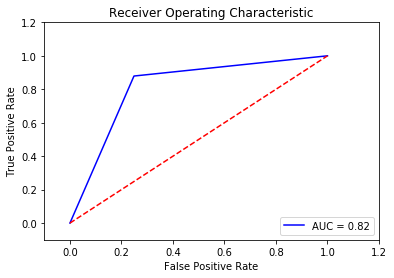

In [120]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [121]:
cm = confusion_matrix(y_test, predictions1)
print (cm)

[[133  44]
 [ 22 160]]
